In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/hypertension_clinical.csv")
df = df.drop_duplicates()
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [3]:

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df_features = list(df.columns)
print(df_features)

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


In [5]:
x = df.drop(["DEATH_EVENT"], axis =1);
y = df["DEATH_EVENT"]
print(y.value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64


(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

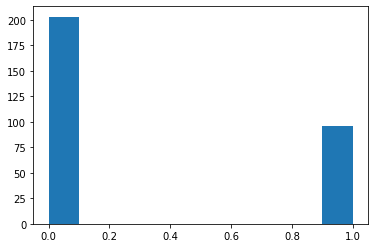

In [6]:
plt.hist(y)

0    96
1    96
Name: DEATH_EVENT, dtype: int64


(array([96.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

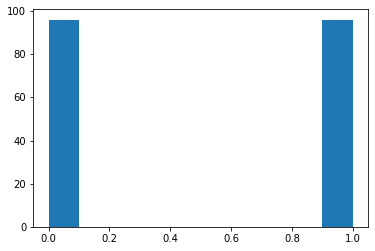

In [7]:
# transform the dataset
under = RandomUnderSampler(random_state = 0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

In [8]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

Accuracy(%) =  56.41025641025641
Number of mislabeled points : 17 / 39
F1 Score (%) =  54.05405405405405
Precision (%) =  62.5
Recall (%) =  47.61904761904761


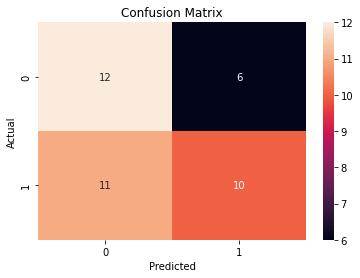

In [9]:
# creating a Nave Bayers classifier
model =KNeighborsClassifier(n_neighbors=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = model.predict(X_test)



accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
f1_score = sm.f1_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("Number of mislabeled points :",(Y_test != Y_pred).sum(),"/" ,  X_test.shape[0])
print("F1 Score (%) = ",f1_score*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)

cf_matrix = confusion_matrix(Y_test, Y_pred)
    

ax= plt.subplot()
sb.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix');
